In [3]:
import pandas as pd
import numpy as np

# Load in datasets

In [4]:
audio_features = pd.read_csv('Data/audio_features.csv')
billboard = pd.read_csv('Data/billboard.csv')

Merge the two datasets together

In [5]:
variable_columns = ['danceability', 'energy', 'valence', 'tempo']
variable_columns = ['danceability', 'energy', 'valence', 'tempo', 'spotify_track_duration_ms', 'key']

joined_data = pd.merge(audio_features, billboard, on='song_id')
joined_data['performer'] = joined_data.performer_x
joined_data = joined_data.drop(['performer_x', 'performer_y'], axis=1)
joined_data['song'] = joined_data.song_x
joined_data = joined_data.drop(['song_x', 'song_y'], axis=1)
joined_data = joined_data.dropna(subset=variable_columns)
joined_data.head()

,song_id,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,spotify_track_popularity,url,week_id,week_position,instance,previous_week_position,peak_position,weeks_on_chart,performer,song
6,......And Roses And RosesAndy Williams,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,0.185,5.0,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/3/1965,78,1,NaN,78,1,Andy Williams,......And Roses And Roses
7,......And Roses And RosesAndy Williams,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,0.185,5.0,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/10/1965,61,1,78.0,61,2,Andy Williams,......And Roses And Roses
8,......And Roses And RosesAndy Williams,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,0.185,5.0,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/17/1965,50,1,61.0,50,3,Andy Williams,......And Roses And Roses
9,......And Roses And RosesAndy Williams,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,0.185,5.0,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/8/1965,36,1,37.0,36,6,Andy Williams,......And Roses And Roses
10,......And Roses And RosesAndy Williams,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,0.185,5.0,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/1/1965,37,1,40.0,37,5,Andy Williams,......And Roses And Roses


# Logistic Regression

Split the data into training and test datasets. The `target` column is `week_position`.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = joined_data[variable_columns]
y = joined_data.week_position
y = y <= 10

# Standardize the features
x_scaler = StandardScaler().fit(X)
X = x_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Perform logistic regression without regularization.

In [7]:
from sklearn.linear_model import LogisticRegression

model_noreg = LogisticRegression(penalty = "none",
                                 max_iter = 1000) # Increase to reach convergence

model_noreg.fit(X_train, y_train)

# Get predicted values
y_pred_noreg = model_noreg.predict(X_test)

Compute the Brier score.

In [8]:
from sklearn.metrics import brier_score_loss

brier_score_loss(y_test, y_pred_noreg)

0.10483702100928317

Perform logistic regression with L1 regularization.

In [9]:
model_reg = LogisticRegression(penalty = "l1",
                               max_iter = 10000, # Increase to reach convergence
                               solver = 'saga') # Default doesn't work for lasso
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)

Compute the brier score.

In [ ]:
brier_score_loss(y_test, y_pred_reg)

0.10483702100928317

Generate ROC curves.

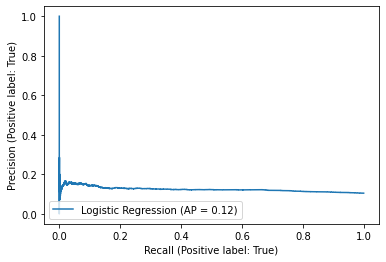

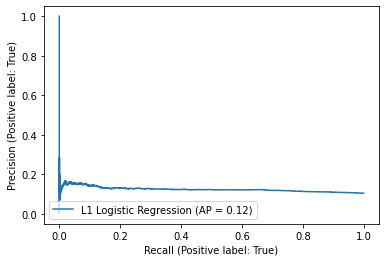

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(model_reg, X_test, y_test, name='Logistic Regression')
PrecisionRecallDisplay.from_estimator(model_noreg, X_test, y_test, name='L1 Logistic Regression')

Generate precision-recall curves.

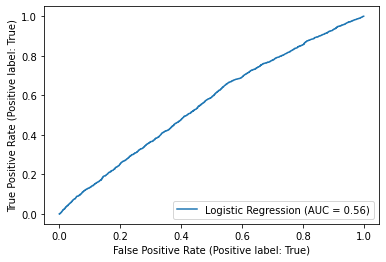

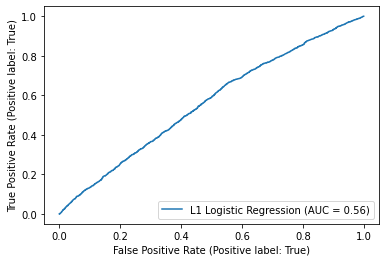

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model_noreg, X_test, y_test, name='Logistic Regression')
RocCurveDisplay.from_estimator(model_reg, X_test, y_test, name='L1 Logistic Regression')

## Linear Regression

Instead of "yes or no" for top 10, we are looking at position on the Top 100

In [ ]:
X = joined_data[variable_columns]
y = joined_data.week_position


x_scaler = StandardScaler().fit(X)
X = x_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


First we will make a non regularized linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge

model_noreg = LinearRegression().fit(X_train, y_train)


y_pred_noreg = model_noreg.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
model_noreg.score(X_train, y_train)


0.004291539428397773

Second we will do an L2 Regularization using Ridge Regression.

In [ ]:
model_reg = Ridge(alpha=1).fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)

In [ ]:
model_reg.score(X_train, y_train)

0.0006513910631021913

Evaluating the two models.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("|Non Regularized Linear Model|")
print("Coefficients: \n", model_noreg.coef_)
# The mean squared error
print("Root Mean squared error: %.2f" % (mean_squared_error(y_test, y_pred_noreg)**(1/2)))

print("\n|Regularized Linear Model|")
print("Coefficients: \n", model_reg.coef_)
# The mean squared error
print("Root Mean squared error: %.2f" % (mean_squared_error(y_test, y_pred_reg)**(1/2)))

|Non Regularized Linear Model|
Coefficients: 
 [-1.33536433  1.39499786 -0.51255214  0.1245802   0.02655776  0.16412422]
Root Mean squared error: 28.75

|Regularized Linear Model|
Coefficients: 
 [-0.22261054  0.         -0.          0.          0.          0.        ]
Root Mean squared error: 28.80


The models apppear to be identical in effectiveness. Now we will examine how each variable (with all other variables being accounted for) changes the weekly position number.

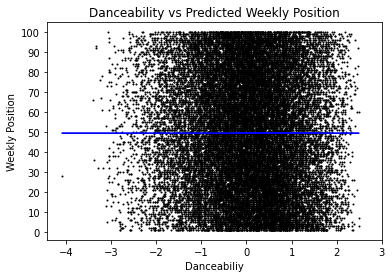

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], y_test, color="black",s=1)
plt.plot(X_test[:,0], y_pred_reg, color="blue", linewidth=1,markersize=1)
plt.title("Danceability vs Predicted Weekly Position")
plt.xlabel("Danceabiliy")
plt.xticks(
    np.arange(
        min( round(min(X_test[:,0])), -round(max(X_test[:,0])) )
        ,max( -round(min(X_test[:,0])), round(max(X_test[:,0])) ) 
        , 1.0
    )
)
# Makes sure the ticks are as symmetric as possible cetnered around 0 and also that they are incremented enough
plt.yticks(np.arange(0,101,10))
# Sets 
plt.ylabel("Weekly Position")
plt.show()

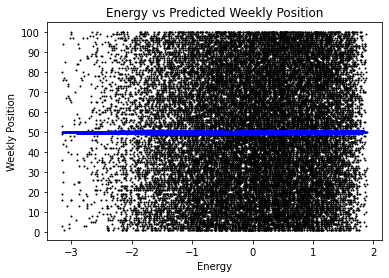

In [ ]:
plt.scatter(X_test[:,1], y_test, color="black",s=1)
plt.plot(X_test[:,1], y_pred_reg, color="blue", linewidth=1,markersize=1)
plt.title("Energy vs Predicted Weekly Position")
plt.xlabel("Energy")
plt.xticks(
    np.arange(
        min( round(min(X_test[:,1])), -round(max(X_test[:,1])) )
        ,max( -round(min(X_test[:,1])), round(max(X_test[:,1])) ) 
        , 1.0
    )
)
# Makes sure the ticks are as symmetric as possible cetnered around 0 and also that they are incremented enough
plt.yticks(np.arange(0,101,10))
# Sets 
plt.ylabel("Weekly Position")
plt.show()

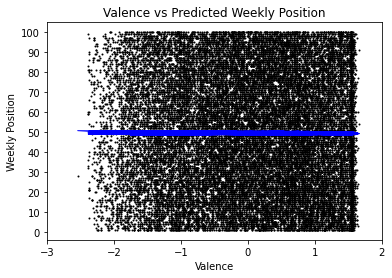

In [ ]:
plt.scatter(X_test[:,2], y_test, color="black",s=1)
plt.plot(X_test[:,2], y_pred_reg, color="blue", linewidth=1,markersize=1)
plt.title("Valence vs Predicted Weekly Position")
plt.xlabel("Valence")
plt.xticks(
    np.arange(
        min( round(min(X_test[:,2])), -round(max(X_test[:,2])) )
        ,max( -round(min(X_test[:,2])), round(max(X_test[:,2])) ) 
        , 1.0
    )
)
# Makes sure the ticks are as symmetric as possible cetnered around 0 and also that they are incremented enough
plt.yticks(np.arange(0,101,10))
# Sets 
plt.ylabel("Weekly Position")
plt.show()

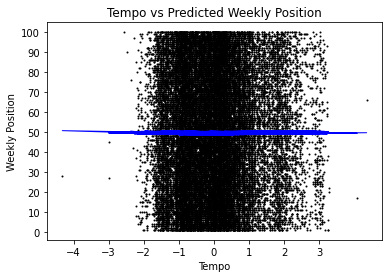

In [ ]:
plt.scatter(X_test[:,3], y_test, color="black",s=1)
plt.plot(X_test[:,3], y_pred_reg, color="blue", linewidth=1,markersize=1)
plt.title("Tempo vs Predicted Weekly Position")
plt.xlabel("Tempo")
plt.xticks(
    np.arange(
        min( round(min(X_test[:,3])), -round(max(X_test[:,3])) )
        ,max( -round(min(X_test[:,3])), round(max(X_test[:,3])) ) 
        , 1.0
    )
)
# Makes sure the ticks are as symmetric as possible cetnered around 0 and also that they are incremented enough
plt.yticks(np.arange(0,101,10))
# Sets 
plt.ylabel("Weekly Position")
plt.show()

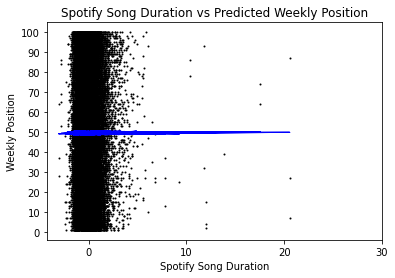

In [ ]:
plt.scatter(X_test[:,4], y_test, color="black",s=1)
plt.plot(X_test[:,4], y_pred_reg, color="blue", linewidth=1,markersize=1)
plt.title("Spotify Song Duration vs Predicted Weekly Position")
plt.xlabel("Spotify Song Duration")
plt.xticks(
    np.arange(
        0
        ,round(max(X_test[:,4])+10 ) 
        , 10
    )
)
# Makes sure the ticks are as symmetric as possible cetnered around 0 and also that they are incremented enough
plt.yticks(np.arange(0,101,10))
# Sets 
plt.ylabel("Weekly Position")
plt.show()

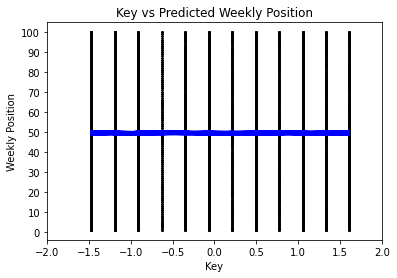

In [ ]:
plt.scatter(X_test[:,5], y_test, color="black",s=1)
plt.plot(X_test[:,5], y_pred_reg, color="blue", linewidth=1,markersize=1)
plt.title("Key vs Predicted Weekly Position")
plt.xlabel("Key")
plt.xticks(
    np.arange(
        -2,2.5
        , 0.5
    )
)
# Makes sure the ticks are as symmetric as possible cetnered around 0 and also that they are incremented enough
plt.yticks(np.arange(0,101,10))
# Sets 
plt.ylabel("Weekly Position")
plt.show()